In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('audio_features.csv')
df.head()

,Unnamed: 0,track_id,track_name,artist,duration_ms,user,track_id.1,acousticness,danceability,energy,liveness,speechiness,instrumentalness,valence,loudness,tempo
0,0,7Hs6F6EqYCxzMXbAQ8L7P6,Tees Maar Khan,Sonu Nigam,255025,user2,7Hs6F6EqYCxzMXbAQ8L7P6,0.114,0.543,0.872,0.1100,0.1470,0.000036,0.820,-3.400,105.053
1,1,46t32pQpf5pqxBXCZnD3Sg,One Last Time,Westlife,175266,user1,46t32pQpf5pqxBXCZnD3Sg,0.370,0.618,0.638,0.0902,0.0427,0.000000,0.517,-4.694,169.988
2,2,0OQzbOu5JGo2LgtwJI04zO,Daayre,Pritam,290548,user2,0OQzbOu5JGo2LgtwJI04zO,0.500,0.536,0.706,0.1120,0.0274,0.005970,0.442,-5.897,113.972
3,3,0LjkQcdxdsbzQDbhXCqssp,Jag Mag,Amit Trivedi,192024,user2,0LjkQcdxdsbzQDbhXCqssp,0.129,0.873,0.800,0.0575,0.0800,0.000123,0.887,-6.429,108.040
4,4,6D9crvdRbcSP2cZWiEjvnm,Ashq Na Ho - Asees Kaur Version,Asees Kaur,202127,user1,6D9crvdRbcSP2cZWiEjvnm,0.967,0.303,0.105,0.1070,0.0377,0.000000,0.199,-8.769,80.429


In [92]:
df = df.iloc[:,1:]

In [93]:
df.describe()

,duration_ms,acousticness,danceability,energy,liveness,speechiness,instrumentalness,valence,loudness,tempo
count,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,2.517097e+05,0.339182,0.586279,0.621902,0.186076,0.073235,0.017269,0.469540,-6.980531,119.389231
std,9.424614e+04,0.286019,0.156329,0.202519,0.166878,0.066391,0.091293,0.244339,2.676487,28.695197
min,3.617900e+04,0.000323,0.102000,0.016200,0.033200,0.023700,0.000000,0.032000,-23.023000,47.644000
25%,2.023600e+05,0.079600,0.473000,0.476000,0.092400,0.035300,0.000000,0.278000,-8.085000,98.045000
50%,2.375200e+05,0.252000,0.606000,0.632000,0.118000,0.049400,0.000002,0.437000,-6.572000,119.835000
75%,2.839330e+05,0.561000,0.697000,0.783000,0.220000,0.078900,0.000142,0.672000,-5.289000,135.435000
max,1.870041e+06,0.989000,0.968000,0.987000,0.964000,0.602000,0.984000,0.973000,-2.047000,204.312000


In [94]:
df.isnull().sum()

track_id            0
track_name          0
artist              0
duration_ms         0
user                0
track_id.1          0
acousticness        0
danceability        0
energy              0
liveness            0
speechiness         0
instrumentalness    0
valence             0
loudness            0
tempo               0
dtype: int64

In [106]:
audio_features = ['acousticness','danceability','liveness','speechiness',
                     'instrumentalness','valence','energy']

In [145]:
feature_means = df.groupby(['user'])[audio_features].agg(['mean','max','min'])
feature_means

acousticness                  danceability                liveness  \
              mean    max       min         mean    max    min      mean   
user                                                                       
user1     0.324192  0.973  0.000323     0.580992  0.968  0.102  0.199775   
user2     0.353603  0.989  0.000898     0.591366  0.924  0.137  0.172898   

                     speechiness  ...         instrumentalness              \
         max     min        mean  ...     min             mean    max  min   
user                              ...                                        
user1  0.964  0.0332    0.072988  ...  0.0237         0.011701  0.865  0.0   
user2  0.886  0.0334    0.073472  ...  0.0241         0.022626  0.984  0.0   

        valence                   energy                 
           mean    max     min      mean    max     min  
user                                                     
user1  0.447916  0.969  0.0320  0.594865  0.987  0.0561  
user2  0.490342  0.973  0.0362  0.647911  0.987  0.0162  

[2 rows x 21 columns]

In [108]:
df[df['user'] == 'user1']['artist'].value_counts().head()

Ariana Grande    154
Shawn Mendes     109
Westlife          81
Pritam            70
Billie Eilish     31
Name: artist, dtype: int64

In [109]:
df[df['user'] == 'user2']['artist'].value_counts().head()

The Weeknd           128
Pritam                70
Shankar Mahadevan     62
Vishal-Shekhar        30
Amit Trivedi          25
Name: artist, dtype: int64

In [110]:
df_user1 = df[df['user'] == 'user1'].reset_index(drop=True)
df_user1.head()

,track_id,track_name,artist,duration_ms,user,track_id.1,acousticness,danceability,energy,liveness,speechiness,instrumentalness,valence,loudness,tempo
0,46t32pQpf5pqxBXCZnD3Sg,One Last Time,Westlife,175266,user1,46t32pQpf5pqxBXCZnD3Sg,0.3700,0.618,0.638,0.0902,0.0427,0.000000,0.517,-4.694,169.988
1,6D9crvdRbcSP2cZWiEjvnm,Ashq Na Ho - Asees Kaur Version,Asees Kaur,202127,user1,6D9crvdRbcSP2cZWiEjvnm,0.9670,0.303,0.105,0.1070,0.0377,0.000000,0.199,-8.769,80.429
2,5f1IaEneMjdPzlDQXknswD,Never Be Alone,Shawn Mendes,215813,user1,5f1IaEneMjdPzlDQXknswD,0.5140,0.376,0.466,0.0781,0.0353,0.000058,0.276,-6.927,199.835
3,2S1Jdc3FfzIh8wh0RDmwGz,Ghorete Bhromor Elo Gun Guniye,Satarupa Dhar,154644,user1,2S1Jdc3FfzIh8wh0RDmwGz,0.7760,0.714,0.534,0.2990,0.0289,0.000000,0.707,-6.507,109.952
4,45mrPZ4Mqb0pn2RlZdEYtH,Phurrr - Film Version,Pritam,205500,user1,45mrPZ4Mqb0pn2RlZdEYtH,0.0077,0.521,0.853,0.1140,0.0538,0.000000,0.587,-5.131,79.953


In [111]:
df_user2 = df[df['user'] == 'user2'].reset_index(drop=True)
df_user2.head()

,track_id,track_name,artist,duration_ms,user,track_id.1,acousticness,danceability,energy,liveness,speechiness,instrumentalness,valence,loudness,tempo
0,7Hs6F6EqYCxzMXbAQ8L7P6,Tees Maar Khan,Sonu Nigam,255025,user2,7Hs6F6EqYCxzMXbAQ8L7P6,0.1140,0.543,0.872,0.1100,0.1470,0.000036,0.820,-3.400,105.053
1,0OQzbOu5JGo2LgtwJI04zO,Daayre,Pritam,290548,user2,0OQzbOu5JGo2LgtwJI04zO,0.5000,0.536,0.706,0.1120,0.0274,0.005970,0.442,-5.897,113.972
2,0LjkQcdxdsbzQDbhXCqssp,Jag Mag,Amit Trivedi,192024,user2,0LjkQcdxdsbzQDbhXCqssp,0.1290,0.873,0.800,0.0575,0.0800,0.000123,0.887,-6.429,108.040
3,7Gkhsn8d4BOnnsLzOA2g35,"Thingalu Mulugidavo - From ""Simhadri""",Shankar Mahadevan,259086,user2,7Gkhsn8d4BOnnsLzOA2g35,0.0834,0.766,0.857,0.0574,0.0990,0.000020,0.841,-6.788,135.035
4,3DX4Y0egvc0slLcLl31h2p,Secrets,The Weeknd,265600,user2,3DX4Y0egvc0slLcLl31h2p,0.0155,0.665,0.771,0.4600,0.0533,0.000010,0.764,-5.779,109.948


In [152]:
common_tracks = pd.merge(df_user1, df_user2, how='inner', on=['track_id'])
common_tracks

,track_id,track_name_x,artist_x,duration_ms_x,user_x,track_id.1_x,acousticness_x,danceability_x,energy_x,liveness_x,...,acousticness_y,danceability_y,energy_y,liveness_y,speechiness_y,instrumentalness_y,valence_y,loudness_y,tempo_y,boringness_y
0,6D9crvdRbcSP2cZWiEjvnm,Ashq Na Ho - Asees Kaur Version,Asees Kaur,202127,user1,6D9crvdRbcSP2cZWiEjvnm,0.96700,0.303,0.105,0.1070,...,0.96700,0.303,0.105,0.1070,0.0377,0.000000,0.1990,-8.769,80.429,112.460
1,2S1Jdc3FfzIh8wh0RDmwGz,Ghorete Bhromor Elo Gun Guniye,Satarupa Dhar,154644,user1,2S1Jdc3FfzIh8wh0RDmwGz,0.77600,0.714,0.534,0.2990,...,0.77600,0.714,0.534,0.2990,0.0289,0.000000,0.7070,-6.507,109.952,228.245
2,7bpd5E3dqChouEvpNKwile,Tu Jo Mila (Dekhna Na Mud Ke),Pritam,249108,user1,7bpd5E3dqChouEvpNKwile,0.85700,0.575,0.596,0.2630,...,0.85700,0.575,0.596,0.2630,0.0299,0.011100,0.3810,-7.755,124.952,234.297
3,6MemXC7k3UjwcCmahZPb6o,Gato Din Guli,Jhuma Chakraborty,169743,user1,6MemXC7k3UjwcCmahZPb6o,0.86900,0.533,0.311,0.1060,...,0.86900,0.533,0.311,0.1060,0.0286,0.000000,0.3250,-7.609,113.957,190.748
4,19ek2TMXTpXhjn7xkdNAAJ,Theme of Dilwale - DJ Chetas Mix,Pritam,222004,user1,19ek2TMXTpXhjn7xkdNAAJ,0.16300,0.614,0.742,0.1550,...,0.16300,0.614,0.742,0.1550,0.0266,0.000142,0.0768,-4.625,129.978,260.953
5,7cvByqy8euqE4DYLO6b3EU,Naach Meri Jaan,Pritam,287272,user1,7cvByqy8euqE4DYLO6b3EU,0.41500,0.627,0.939,0.1820,...,0.41500,0.627,0.939,0.1820,0.1790,0.000002,0.9200,-3.041,198.106,351.665
6,1DUoaxHClMTqzTZCTcF61z,Chicken Kuk-Doo-Koo,Pritam,343146,user1,1DUoaxHClMTqzTZCTcF61z,0.57100,0.505,0.820,0.7160,...,0.57100,0.505,0.820,0.7160,0.3640,0.000000,0.9020,-5.350,184.518,311.668
7,7iLA6PQeQWRjLDHOJgGpj5,Gerua,Pritam,345558,user1,7iLA6PQeQWRjLDHOJgGpj5,0.63600,0.371,0.668,0.2940,...,0.63600,0.371,0.668,0.2940,0.0497,0.000002,0.4030,-7.269,87.458,184.089
8,40wvNFKWQoisfiXkIPmZyW,Ahista Ahista,Pritam,198468,user1,40wvNFKWQoisfiXkIPmZyW,0.66200,0.386,0.306,0.1090,...,0.66200,0.386,0.306,0.1090,0.0304,0.000000,0.3190,-9.466,179.923,239.657
9,3oM90C4SZLYzVZJEZD5EQk,Khairiyat (Bonus Track),Pritam,270706,user1,3oM90C4SZLYzVZJEZD5EQk,0.48400,0.605,0.655,0.1520,...,0.48400,0.605,0.655,0.1520,0.0364,0.000001,0.5970,-5.625,124.974,245.349


In [154]:
print('No. of common tracks: ', len(common_tracks))

No. of common tracks:  53


In [112]:
user1_means = list(feature_means.iloc[0])
user2_means = list(feature_means.iloc[1])

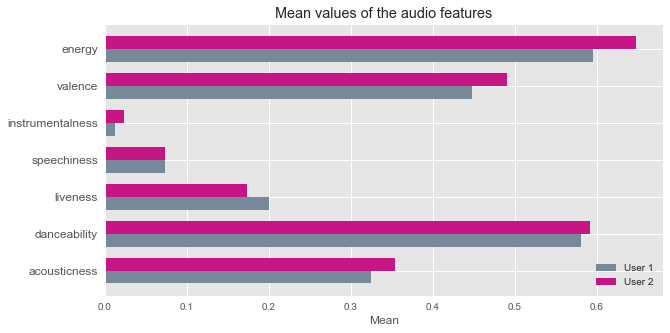

In [113]:
length = len(user1_means)
index = np.arange(length)

plt.figure(figsize = (10,5))
width = 0.35  
#Bar plot with my list
plt.barh(index, user1_means , width, label='User 1', color = 'lightslategray')
#Bar plot with her list
plt.barh(index + width, user2_means, width, label='User 2', color = 'mediumvioletred')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(index + width / 2, (audio_features), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(8,8)
# Set style
style.use("ggplot")

plt.show()

### Difference between the means of each of the audio features of the two users

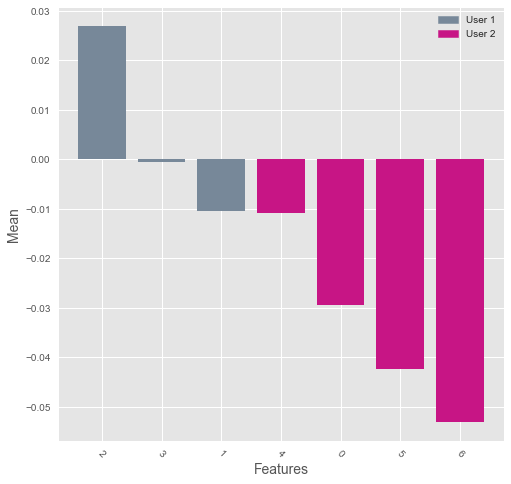

In [117]:
colors = ['lightslategray','lightslategray','lightslategray',
          'mediumvioletred','mediumvioletred','mediumvioletred','mediumvioletred']
diff_features = pd.Series(np.array(user1_means) - np.array(user2_means))

index = diff_features.sort_values(ascending = False).index

#Plot
fig, ax = plt.subplots()
x = np.arange(diff_features.count())
y = diff_features.sort_values(ascending = False)
plt.bar(x,y, color = colors)
plt.xticks(x, (feature_means.columns))
ax.set_xticklabels(index, rotation=-45)



#Create Legend
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='lightslategray', label = 'User 1')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'User 2')
plt.legend(handles = [gray_patch,violet_patch], loc = 'upper right')

#labels
plt.ylabel('Mean', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.show()

In [119]:
feats_user1 = df_user1[audio_features]
feats_user2 = df_user2[audio_features]

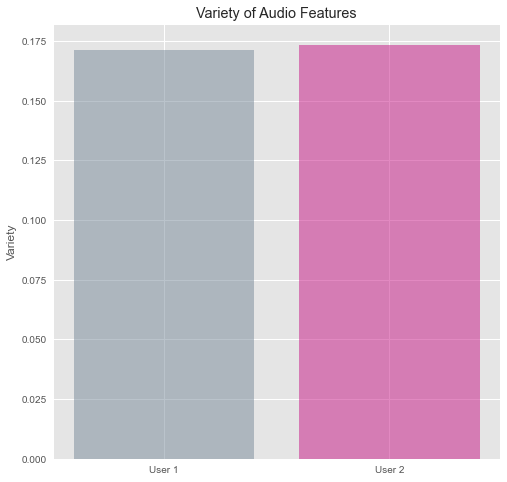

In [120]:
data = [feats_user1.std().mean(), feats_user2.std().mean()]
names = ('User 1','User 2')
pos = np.arange(len(names))
colors = ['lightslategray', 'mediumvioletred']

plt.bar(pos, data, align = 'center', alpha = 0.5, color = colors)
plt.xticks(pos, names)
plt.ylabel('Variety')
plt.title('Variety of Audio Features')
plt.show()

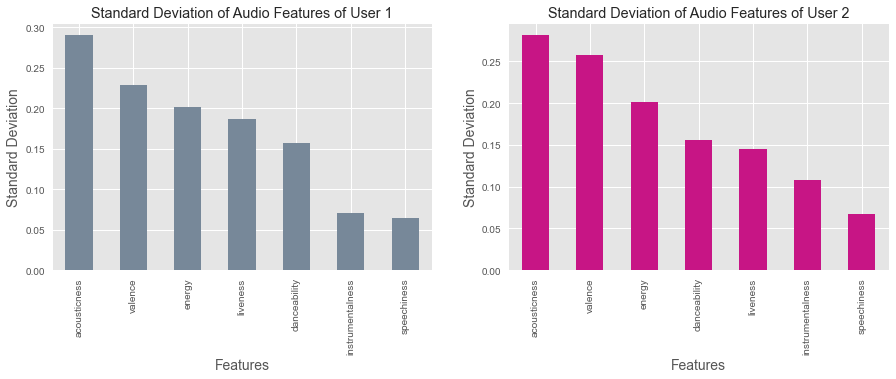

In [121]:
plt.figure(figsize = (15,10))
plt.subplot(221)

feats_user1.std().sort_values(ascending= False).plot(kind = 'bar', color = 'lightslategray')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Audio Features of User 1")

plt.subplot(222)
feats_user2.std().sort_values(ascending= False).plot(kind = 'bar', color = 'mediumvioletred')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Audio Features of User 2")
plt.rcParams['figure.figsize'] =(15,15)
plt.show()

## Distribution of Boringness

In [124]:
df_user1['boringness'] = df_user1['loudness'] + df_user1['tempo'] + df_user1['energy']*100 + df_user1['danceability']*100
df_user2['boringness'] = df_user2['loudness'] + df_user2['tempo'] + df_user2['energy']*100 + df_user2['danceability']*100

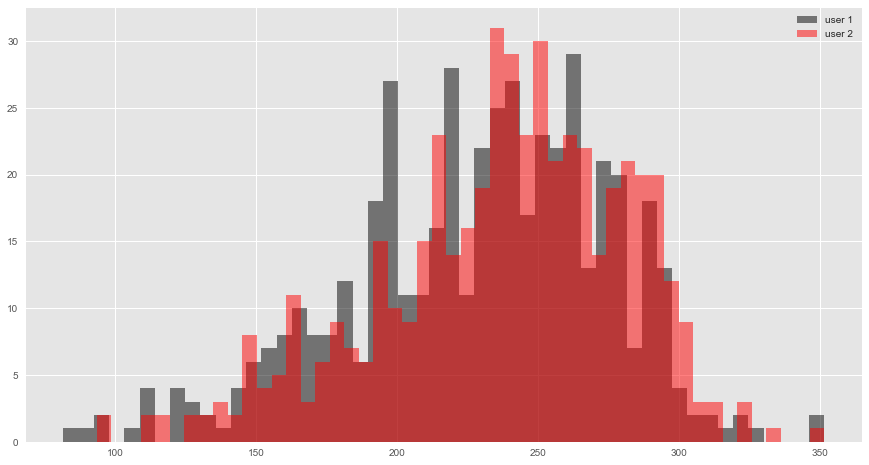

In [164]:
plt.figure(figsize = (15,8))
x = list(df_user1['boringness'])
y = list(df_user2['boringness'])

plt.hist(x, bins = 50 ,alpha=0.5, label='user 1', color='black')
plt.hist(y, bins = 50 ,alpha=0.5, label='user 2',color = 'red')
plt.legend(loc='upper right')
plt.show()